'''

=================================================


Nama  : Tasya Amalia


Tugas ini dibuat untuk menganalisis dan visualisasi data dari faktor-faktor yang mempengaruhi besarnya premi kesehatan.


=================================================

'''


### **Link URL Dashboard Tableau**: 
https://public.tableau.com/shared/5YQTBJCQ6?:display_count=n&:origin=viz_share_link

## **IDENTIFIKASI MASALAH**

### **Latar Belakang**
Kesehatan merupakan hal utama yang harus diperhatikan dan diupayakan oleh setiap manusia untuk menopang keberlangsungan 
aktivitas sehari-hari secara produktif. Salah satu cara yang dapat dilakukan seseorang untuk mempersiapkan diri apabila terjadi risiko yang menimbulkan suatu penyakit yaitu dengan memiliki asuransi kesehatan. Jika dilihat dari kebutuhan, pemilihan premi  disesuaikan dengan kondisi ekonomi, mengingat asuransi bukan merupakan kebutuhan primer namun keberadaan asuransi dapat memenuhi kebutuhan primer ketika terjadi resiko bagi pemilik asuransi. Terdapat beberapa faktor yang mempengaruhi penentu besarnya nilai premi yang harus dibayarkan oleh pemilik asuransi, tergantung pada beberapa aspek seperti kondisi pemilik asuransi (usia, jenis kelamin, jumlah anak, pendapatan, kondisi kesehatan). Semakin pemilik asuransi memiliki kondisi kesehatan yang berisiko, maka semakin mahal premi yang harus dibayarkan. Oleh karena itu, saya ingin mengetahui faktor apa saja yang mempengaruhi besarnya premi yang harus dibayarkan sehingga peserta asuransi dapat menjaga kesehatannya untuk mengantisipasi pembayaran yang tidak sesuai ekspektasi.


### **Problem Statement**

##### **SMART Framework**
*Health Insurance*

S: Untuk mengetahui faktor-faktor yang mempengaruhi besarnya premi kesehatan 

M: Peserta asuransi dapat mendapatkan tarif premi asuransi kesehatan minimal sekitar $1121

A: Melakukan analisis faktor yang memengaruhi besarnya premi kesehatan

R: Dengan mengetahui faktor penyebab besarnya premi, peserta asuransi dapat menjaga kesehatanya untuk mendapatkan tarif premi yang diinginkan atau sesuai ekspetasi yang diharapkan

T: Penyelesaian analisis dalam terselesaikan dalam waktu 1 minggu


##### **Problem Statement**
Peserta Asuransi ingin mengetahui apa saja faktor yang mempengaruhi besarnya premi asuransi kesehatan yang harus dibayarkan sehingga peserta dapat mendapatkan tarif premi asuransi kesehatan  minimal sekitar $1121. Oleh karena itu, dilakukan analisis data untuk mengetahui faktor apa saja yang mempengaruhi besarnya premi kesehatan. Dengan hasil tersebut, peserta asuransi dapat menjaga kesehatanya untuk mendapatkan tarif premi yang diinginkan atau sesuai ekspetasi yang diharapkan. Analisis data ini diharapkan dapat terselesaikan dalam waktu 1 minggu.


### **Penjabaran Masalah**
Untuk menjabarkan permasalahan tersebut digunakan metode 5W+1H, yaitu:
1. Berapa rata-rata premi asuransi kesehatan yang dibayarkan oleh peserta asuransi? serta berapakah nilai terendah dan terbesarnya? **(visualisasi Statistika Deskriptif)**

2. Siapa yang memiliki rata-rata premi paling tinggi?  **(visualisasi 1)**

3. Di wilayah mana rata-rata premi paling tinggi? **(visualisasi 2)**

4. Berapa premi rata-rata peserta berdasarkan status merokok dan kategori BMI? **(visualisasi 3)**

5. Berapa premi rata-rata peserta berdasarkan jenis kelamin dan kategori usia? **(visualisasi 4)**

6. Apakah terdapat hubungan antara kategori usia, jenis kelamin, kategori berat badan, jumlah anak, status merokok dan wilayah dengan kelompok premi yang dibayarkan oleh peserta asuransi? **(uji hipotesis chi-square)**

7. Apakah status merokok sangat mempengaruhi besarnya premi kesehatan? **(uji korelasi spearman & visualisasi Statistika Deskriptif)**

## **IMPORT LIBRARY**

In [2]:
# Melakukan import beberapa library python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **DATA LOADING**

Dataset yang saya gunakan mengenai **_Health Insurance_** yang diperoleh dari Kaggle dengan link berikut: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

In [3]:
'''
Melakukan load  data ke dalam pandas DataFrame dari sumber csv
'''

df = pd.read_csv('insurance.csv')



## **DATA PREPARATION & CLEANING**

In [4]:
# Menampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Ringkasan informasi dari DataFrame ini yaitu terdapat 1338 baris dan 7 kolom. DataFrame ini memiliki beberapa tabel yaitu, age, sex, bmi, children, smoker, region dan charges. Selain itu, hasil tersebut menunjukkan bahwa tidak terdapat nilai null pada semua kolom.

- Tipe data dari DataFrame ini terdiri dari 2 float, 2 integer, dan 3 object. Dari hasil tersebut memiliki tipe data yang sudah sesuai.

In [5]:
# Cek apakah ada data duplikat
df.duplicated().sum()

1

In [6]:
# Menghapus data duplikat
df_cleaned = df.drop_duplicates(inplace=True)
df_cleaned

Berdasarkan hasil tersebut diketahui DataFrame ini memiliki data duplikat sebanyak 1 data dan berhasil dilakukan penghapusan data duplikat.

#### Membuat kolom baru

In [7]:
# masih ragu pengkategori nya
# Membuat kategori usia (masih ragu sama kategory)
def category_age(age):
    if 13 <= age <= 19:
        return 'Remaja'
    elif 20 <= age <= 45:
        return 'Dewasa'
    else:
        return 'Lansia'

# Membuat kategori BMI menggunakan apply()
df['age category'] = df['age'].apply(category_age)

# Menampilkan DataFrame
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     age category  
0          Remaja  
1          Remaja  
2          Dewasa  
3          Dewasa  
4          Dewasa  
...           ...  
1333       Lansia  

In [8]:
# Menampilkan jumlah peserta asuransi berdasarkan kategori usia
df['age category'].value_counts()

Dewasa    701
Lansia    500
Remaja    136
Name: age category, dtype: int64

Diketahui bahwa peserta asuransi paling banyak pada kategori usia Adult (Dewasa) (701 peserta) dan paling sedikit pasa usia Youth (Remaja) (136 peserta).

In [9]:
# Membuat kategori BMI
def category_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Membuat kategori BMI menggunakan apply()
df['bmi category'] = df['bmi'].apply(category_bmi)

# Menampilkan DataFrame
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     age category   bmi category  
0          Remaja     Overweight  
1          Remaja        Obesity  
2          Dewasa        Obesity  
3          Dewasa  

In [10]:
# Menampilkan jumlah peserta asuransi berdasarkan kategori BMI
df['bmi category'].value_counts()

Obesity          721
Overweight       374
Normal weight    222
Underweight       20
Name: bmi category, dtype: int64

Diketahui bahwa peserta asuransi paling banyak pada kategori berat badan obesitas (721 peserta) dan paling sedikit pada kategori underweight (20 peserta)

#### Menampilkan Data Statistik
Untuk mengetahui nilai dari central tendency, skewness dan kurtosis disetiap kolom numerik.

In [11]:
# Menampilkan data statisik untuk kolom numerik
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- diketahui bahwa premi terendah yang dibayarkan oleh peserta asuransi sebesar $1121.87 dan tertinggi sebesar $63770.42

- diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi sebesar $13279.12

##### Usia

In [12]:
# Menghitung mean dari kolom Usia
age_mean = df['age'].mean()
round_age_mean = round(age_mean)
print('Mean dari Usia adalah', round_age_mean)

# Menghitung median dari kolom Usia
age_median = df['age'].median()
round_age_median = round(age_median)
print('Median dari Usia adalah',round_age_median)

# Menghitung modus dari kolom Usia
print('Modus dari Usia adalah',df['age'].mode()[0])

# Menghitung Skewness dari kolom Usia
print('Nilai Skewness dari Usia adalah', df['age'].skew().round(2))

# Menghitung Kurtosis dari kolom Usia
print('Nilai Kurtosis dari Usia adalah', df['age'].kurtosis().round(2))

Mean dari Usia adalah 39
Median dari Usia adalah 39
Modus dari Usia adalah 18
Nilai Skewness dari Usia adalah 0.05
Nilai Kurtosis dari Usia adalah -1.24


- Berdasarkan hasil analisis, diketahui bahwa rata-rata dan median usia peserta asuransi pada 39 tahun dan paling banyak pada usia 18 tahun. 

- Berdasarkan hasil analisis menunjukkan bahwa data berdistribusi normal diketahui dengan nilai median = mean. 

- Hasil tersebut menunjukkan bahwa memilki nilai skewness 0.05 yang artinya datanya hampir simetris karena berada diantara -0.5 dan 0.5. selain itu nilai kurtosis nya adalah -1.24 < 0 yang memiliki puncak yang lebih datar atau disebut juga dengan Platykurtic


<AxesSubplot:>

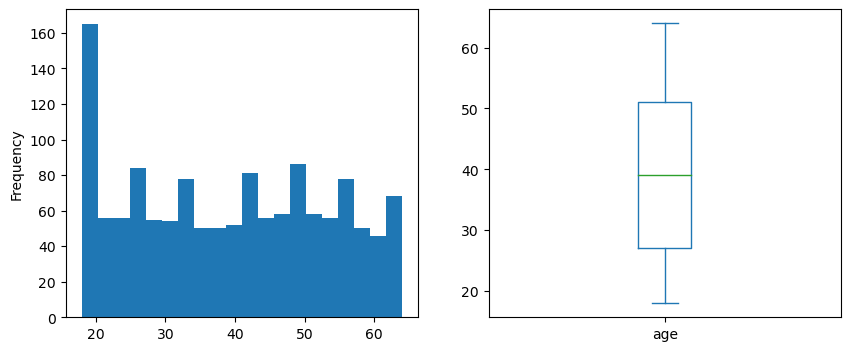

In [13]:
# Visualisasi data kolom usia
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['age'].plot(kind='hist',bins=20,ax=ax[0])
df['age'].plot(kind='box',ax=ax[1])

- Berdasarkan grafik boxplot kolom usia menunjukkan tidak terdapat data outlier dan pada grafik batang terlihat memiliki puncak yang lebih datar atau Platykurtic.


##### BMI

In [14]:
# Menghitung mean dari kolom BMI
BMI_mean = df['bmi'].mean()
round_BMI_mean = round(BMI_mean)
print('Mean dari BMI adalah', round_BMI_mean)

# Menghitung median dari kolom BMI
BMI_median = df['bmi'].median()
round_BMI_median = round(BMI_median)
print('Median dari BMI adalah', round_BMI_median)

# Menghitung modus dari kolom BMI
print('Modus dari BMI adalah',df['bmi'].mode()[0])

# Menghitung Standar Deviasi dari kolom BMI
BMIlSTD = df['bmi'].std()
round_BMI_std = round(BMIlSTD, 2)
print('Standar Deviasi dari BMI  adalah', round_BMI_std)

# Menghitung Skewness dari BMI
print('Nilai Skewness dari BMI adalah', df['bmi'].skew().round(2))

# Menghitung Kurtosis dari BMI
print('Nilai Kurtosis dari BMI adalah', df['bmi'].kurtosis().round(2))

Mean dari BMI adalah 31
Median dari BMI adalah 30
Modus dari BMI adalah 32.3
Standar Deviasi dari BMI  adalah 6.1
Nilai Skewness dari BMI adalah 0.28
Nilai Kurtosis dari BMI adalah -0.05


- Berdasarkan hasil analisis, diketahui bahwa rata-rata BMI peserta asuransi yaitu 31 kg dan median nya adalah 30 kg dengan BMI terbanyak pada 32.3kg

- Berdasarkan hasil analisis menunjukkan bahwa data hampir berdistribusi normal diketahui dengan nilai median yang tidak terlalu berbeda dengan nilai mean. 

- Bedasarkan hasil tersebut diketahui juga bahwa semakin kecil nilai standar deviasi dari nilai mean maka data semakin serupa nilai nya pada kolom BMI atau semakin akurat dengan mean 


- Hasil tersebut menunjukkan bahwa memilki nilai skewness 0.28 yang artinya datanya hampir simetris karena berada diantara -0.5 dan 0.5. selain itu nilai kurtosis nya adalah -0,05 < 0 yang memiliki puncak yang lebih datar atau disebut juga dengan Platykurtic


<AxesSubplot:>

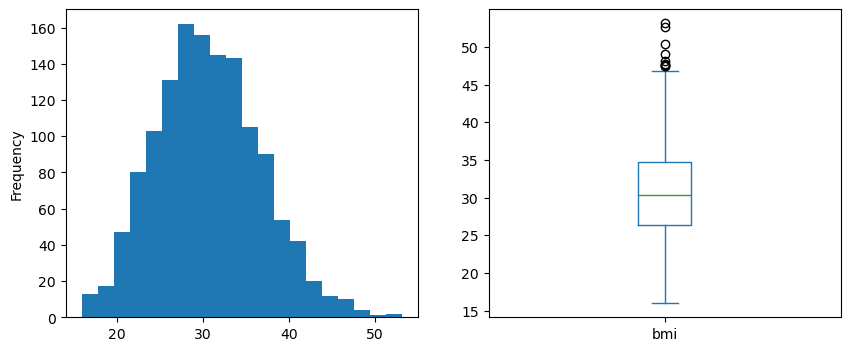

In [15]:
# Visualisasi data kolom BMI
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['bmi'].plot(kind='hist',bins=20,ax=ax[0])
df['bmi'].plot(kind='box',ax=ax[1])

- Berdasarkan grafik boxplot kolom usia menunjukkan terdapat sedikit data outlier dan pada grafik batang terlihat memiliki puncak yang lebih datar atau Platykurtic.


##### Premi Asuransi Kesehatan


In [16]:
# Menghitung mean dari kolom premi
charges_mean = df['charges'].mean()
round_charges_mean = round(charges_mean,2)
print(f"Mean dari premi adalah ${round_charges_mean}")

# Menghitung median dari kolom premi
charges_median = df['charges'].median()
round_charges_median = round(charges_median,2)
print(f"Median dari premi adalah ${round_charges_median}")

# Menghitung modus dari kolom premi
print(f"Modus dari premi adalah ${df['charges'].mode()[0]}")

# Menghitung Skewness dari premi
print('Nilai Skewness dari premi adalah', df['charges'].skew().round(2))

# Menghitung Kurtosis dari premi
print('Nilai Kurtosis dari premi adalah', df['charges'].kurtosis().round(2))

Mean dari premi adalah $13279.12
Median dari premi adalah $9386.16
Modus dari premi adalah $1121.8739
Nilai Skewness dari premi adalah 1.52
Nilai Kurtosis dari premi adalah 1.6


- Berdasarkan hasil analisis, diketahui bahwa rata-rata biaya asuransi peserta asuransi sebesar $13279.12

- Berdasarkan hasil analisis menunjukkan bahwa data tidak berdistribusi normal diketahui dengan nilai median < mean yang artinya kemiringan data ke arah kanan atau ekornya condong ke kanan (positiv skew).

- Hasil tersebut menunjukkan bahwa biaya asuransi memilki nilai skewness 1.52 > 0 sehingga kemiringan data ke arah positif atau ekor condong ke bagian kanan dan memiliki data yang sangat miring karena hasil skewness nya yaitu < -1 dan > 1. Selain itu nilai kurtosis nya adalah 1.6 > 0  artinya memiliki keruncingan yang sangat tinggi atau distribusi Leptokurtik.


<AxesSubplot:>

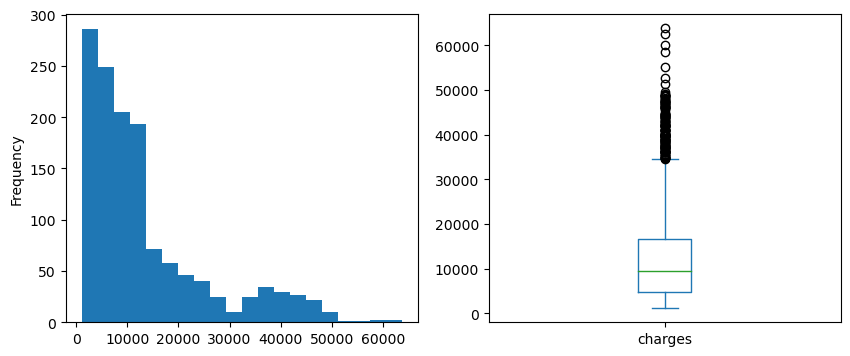

In [17]:
# Visualisasi data kolom charges
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['charges'].plot(kind='hist',bins=20,ax=ax[0])
df['charges'].plot(kind='box',ax=ax[1])

- Berdasarkan grafik boxplot menunjukkan adanya data yang outlier. Selain itu grafik bar menunjukkan kemiringan data ke arah kanan atau ekornya condong ke kanan (positiv skew).

In [18]:
# Menyalin DataFrame
df_copy = df.copy()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1337 non-null   int64  
 1   sex           1337 non-null   object 
 2   bmi           1337 non-null   float64
 3   children      1337 non-null   int64  
 4   smoker        1337 non-null   object 
 5   region        1337 non-null   object 
 6   charges       1337 non-null   float64
 7   age category  1337 non-null   object 
 8   bmi category  1337 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 104.5+ KB


In [20]:
# menghandling outlier pada kolom charges dengan tukey's rule

q3 = df_copy['charges'].quantile(0.75)
q1 = df_copy['charges'].quantile(0.25)

iqr = q3 - q1

min_boundary = q1 - (iqr * 1.5)
max_boundary = q3 + (iqr * 1.5)

print(f'Batas Minimal kolom charges adalah: {min_boundary}')
print(f'Batas Maksimal kolom charges adalah: {max_boundary}')

# Mendefinisikan data yang outlier untuk menghitung total outlier (| atau OR bitwise))
outlier_chargesTotal = df_copy[(df_copy['charges'] < min_boundary) | (df_copy['charges'] > max_boundary)]

print(f'Total outlier {len(outlier_chargesTotal)} data')
print(f'Persentase outlier pada kolom charges adalah sebesar {len(outlier_chargesTotal)*100/len(df_copy["charges"]):.2f}%')

Batas Minimal kolom charges adalah: -13120.716174999998
Batas Maksimal kolom charges adalah: 34524.777625
Total outlier 139 data
Persentase outlier pada kolom charges adalah sebesar 10.40%


- Untuk menghapus nilai outlier menggunakan Tukey's Rule karena data tidak berdistribusi normal. Diketahui bahwa total outlier sebanyak 139 dari 1337 data atau sekitar 10.40% data ini memiliki outlier. Selanjutnya saya akan mendefinisikan DataFrame baru setelah outlier dihapus.

In [21]:
# mendefinisikan DataFrame baru tanpa outlier
df_no_outlier = df_copy[(df_copy['charges'] >= min_boundary) & (df_copy['charges'] <= max_boundary)]

<AxesSubplot:>

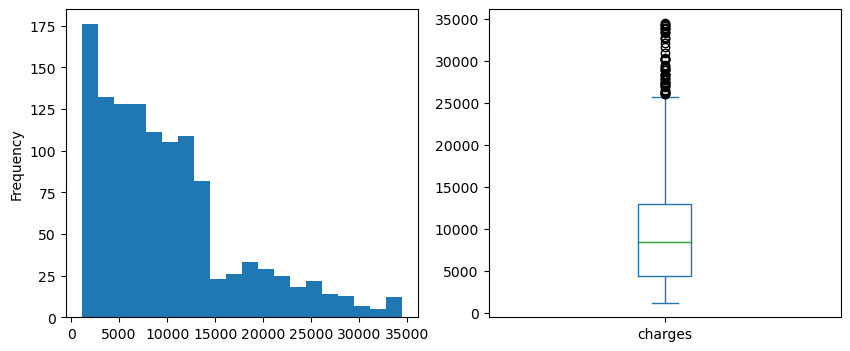

In [22]:
# melihat box plot untuk setelah menghilangkan outlier pada kolom charges
fig, ax = plt.subplots(ncols=2,figsize=(10,4))
df_no_outlier['charges'].plot(kind='hist',bins=20,ax=ax[0])
df_no_outlier['charges'].plot(kind='box',ax=ax[1])

- Meskipun sudah dilakukan penghapusan outlier, pada grafik boxplot masih terdapat outlier namuan persebaran datanya sudah cukup jelas.

In [23]:
# Ringkasan informasi DataFrame setelah menghapus outlier
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1198 non-null   int64  
 1   sex           1198 non-null   object 
 2   bmi           1198 non-null   float64
 3   children      1198 non-null   int64  
 4   smoker        1198 non-null   object 
 5   region        1198 non-null   object 
 6   charges       1198 non-null   float64
 7   age category  1198 non-null   object 
 8   bmi category  1198 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 93.6+ KB


- Pada DataFrame yang sudah dilakukan penghapusan outlier, data dari 1337 menjadi 1198 data. Hal ini karena terdapat 139 data telah di hapus. Oleh karena itu, untuk melakukan analisis data saya menggunakan DataFrame tanpa outlier karena keberadaan outlier dapat mempengaruhi hasil analisis. 

## **ANALISIS DATA**

##### 1. Berapa rata-rata premi asuransi kesehatan yang harus dibayarkan oleh peserta asuransi? serta berapakah nilai terendah dan terbesarnya? (Visualisasi Statistika Deskriptif)

In [58]:
meanPremi = df_no_outlier['charges'].mean()
print('Mean dari Premi adalah', meanPremi)


minPremi = df_no_outlier['charges'].min()
print('Nilai terendah dari Premi adalah', minPremi)

maxPremi = df_no_outlier['charges'].max()
print('Nilai tertinggi dari Premi adalah', maxPremi)

# Membuat DataFrame dengan data statistik
data_statistik = {
    'Statistik': ['Mean', 'Minimum', 'Maksimum'],
    'Biaya Asuransi': [meanPremi, minPremi, minPremi]
}

Mean dari Premi adalah 9934.671757970784
Nilai terendah dari Premi adalah 1121.8739
Nilai tertinggi dari Premi adalah 34472.841


Berdasarkan hasil tersebut, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi sebesar $9934.67 dengan nilai terendah nya sebesar $1121.87 dan nilai tertinggi nya sebesar $34472.84.

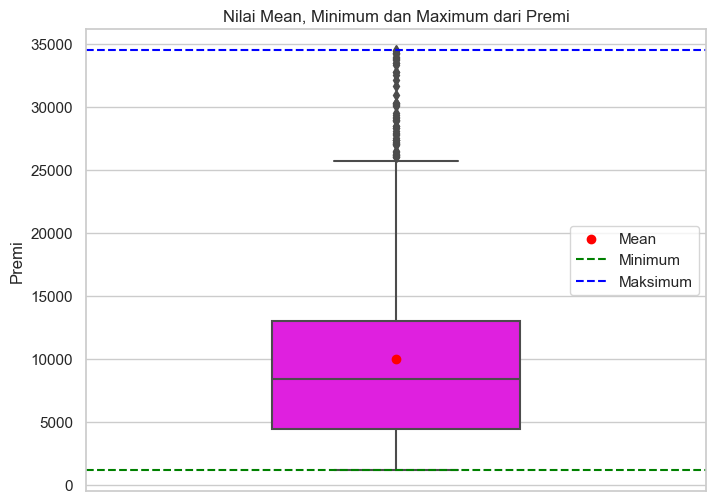

In [68]:
# Menampilkan visualisasi data menggunakan box plot 
plt.figure(figsize=(8, 6))
sns.boxplot(y="charges", color='magenta', data =df_no_outlier, width=0.4)
plt.scatter(0, meanPremi, color='red', label='Mean', zorder=3)  
plt.axhline(y=minPremi, color='green', linestyle='--', label='Minimum')  
plt.axhline(y=maxPremi, color='blue', linestyle='--', label='Maksimum')  
plt.legend()
plt.title('Nilai Mean, Minimum dan Maximum dari Premi')
plt.ylabel('Premi')
plt.show()

Berdasarkan boxplot tersebut diketahui pada kolom premi memiliki data outlier.

##### 2. Siapa yang memiliki rata-rata biaya asuransi paling tinggi? **(visualisasi 1)**

##### Kategori Usia

In [25]:
# mengelompokan kelompok usia berdasarkan rata-rata premi
age_result_no = df_no_outlier.groupby('age category')['charges'].mean().reset_index()
age_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(age_result_no)

,age category,charges
1,Lansia,13702.375678
0,Dewasa,8004.349034
2,Remaja,6233.751946


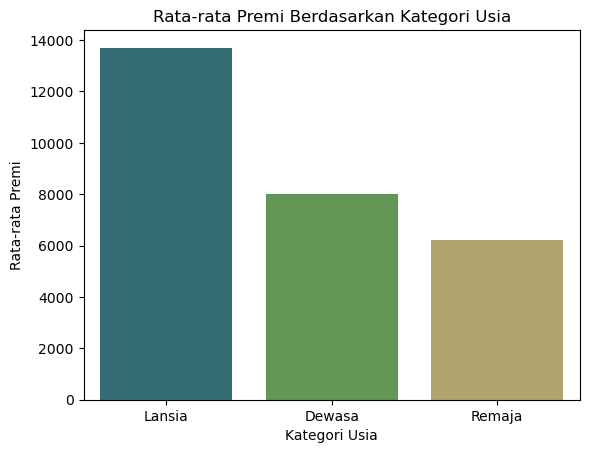

In [26]:
# Membuat visualisasi data

# Membuat bar chart 
sns.barplot(x='age category', y='charges', data=age_result_no, palette='gist_earth')

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Kategori Usia')

# Mengganti label sumbu x dan y
plt.xlabel('Kategori Usia')
plt.ylabel('Rata-rata Premi')

# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada kategori  lansia sebesar $13702.37

##### Jenis Kelamin

In [27]:
# mengelompokan jenis kelamin berdasarkan rata-rata premi
sex_result_no = df_no_outlier.groupby('sex')['charges'].mean().reset_index()
sex_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(sex_result_no)


,sex,charges
0,female,10100.424469
1,male,9761.564831


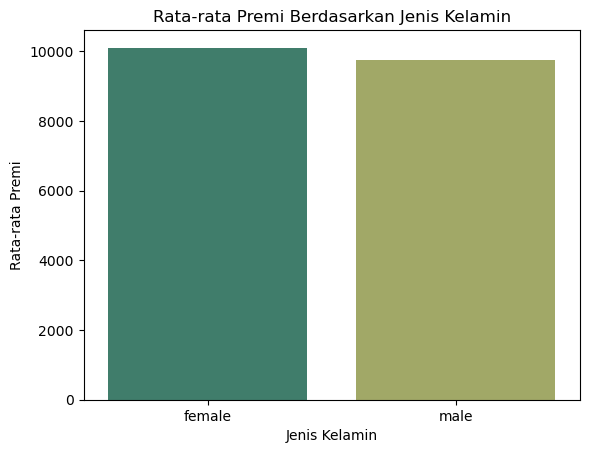

In [28]:
# Membuat visualisasi data
# Membuat bar chart
sns.barplot(x='sex', y='charges', data=sex_result_no, palette='gist_earth')

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Jenis Kelamin')

# Mengganti label sumbu x dan y
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Premi')

# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada jenis kelamin perempuan sebesar $10100.42

##### Kategori BMI

In [29]:
# mengelompokan kategori BMI berdasarkan rata-rata premi
bmi_result_no= df_no_outlier.groupby('bmi category')['charges'].mean().reset_index()
bmi_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(bmi_result_no)

,bmi category,charges
2,Overweight,10741.081153
0,Normal weight,10267.780842
1,Obesity,9337.841843
3,Underweight,8852.200585


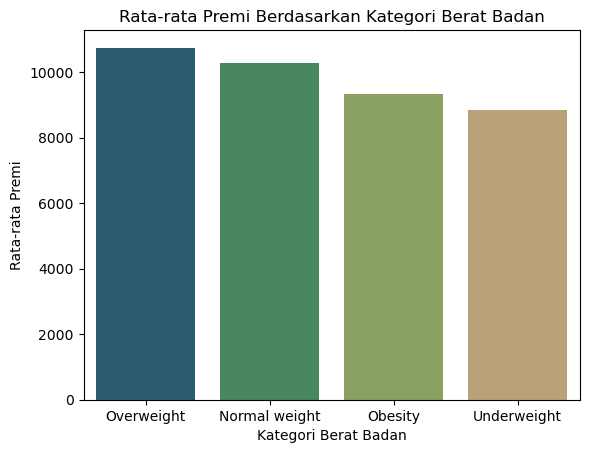

In [30]:
# Membuat visualisasi data
# Membuat bar chart 
sns.barplot(x='bmi category', y='charges', data=bmi_result_no, palette='gist_earth')

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Kategori Berat Badan')

# Mengganti label sumbu x dan y
plt.xlabel('Kategori Berat Badan')
plt.ylabel('Rata-rata Premi')

# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada kategori Overweight sebesar $10741.08

##### Jumlah Anak

In [31]:
# mengelompokan jumlah anak berdasarkan rata-rata premi
children_result_no = df_no_outlier.groupby('children')['charges'].mean().reset_index()
children_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(children_result_no)

,children,charges
4,4,11717.559983
3,3,11538.401820
2,2,10613.375596
1,1,9484.740273
0,0,9454.674220
5,5,8786.035247


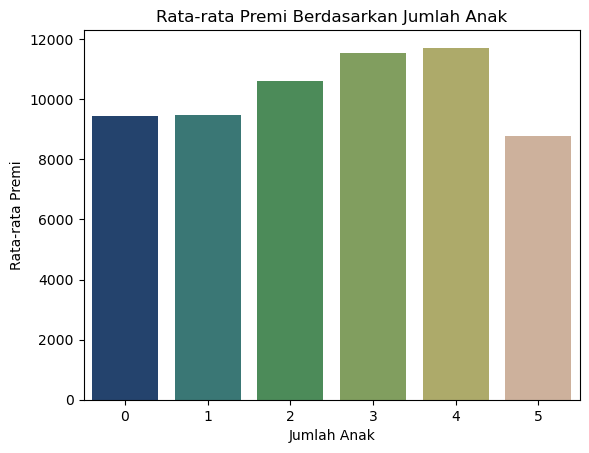

In [32]:
# Membuat visualisasi data
# Membuat bar chart 
sns.barplot(x='children', y='charges', data=children_result_no, palette='gist_earth')

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Jumlah Anak')

# Mengganti label sumbu x dan y
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata-rata Premi')

# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada peserta yang memiliki jumlah anak sebanyak 4 orang dengan biaya sebesar $11717.55

##### Status Merokok

In [33]:
# mengelompokan status merokok berdasarkan rata-rata premi
smoking_result_no = df_no_outlier.groupby('smoker')['charges'].mean().reset_index()
smoking_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(smoking_result_no)

,smoker,charges
1,yes,22014.245543
0,no,8362.048001


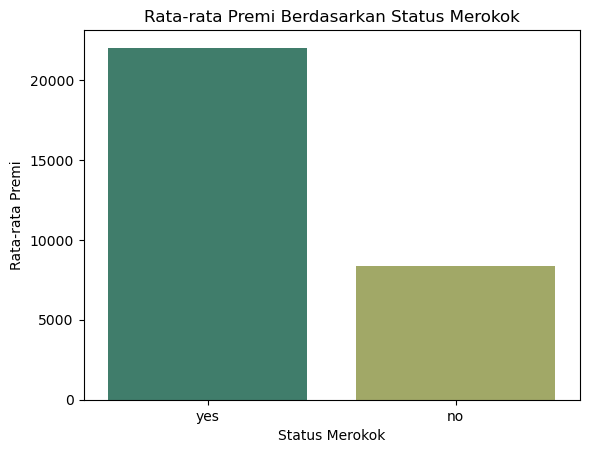

In [34]:
# Membuat visualisasi data
# Membuat bar chart 
sns.barplot(x='smoker', y='charges', data=smoking_result_no, palette='gist_earth')

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Status Merokok')

# Mengganti label sumbu x dan y
plt.xlabel('Status Merokok')
plt.ylabel('Rata-rata Premi')

# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada yang merokok sebesar $22014.24

##### 3.  Di wilayah mana rata-rata premi paling tinggi? **(visualisasi 2)**

In [35]:
# mengelompokan region berdasarkan rata-rata premi
region_result_no = df_no_outlier.groupby('region')['charges'].mean().reset_index()
region_result_no.sort_values(by='charges', ascending=False, inplace=True)
pd.DataFrame(region_result_no)

,region,charges
0,northeast,10736.262980
1,northwest,10392.290654
2,southeast,9574.280940
3,southwest,9021.451259


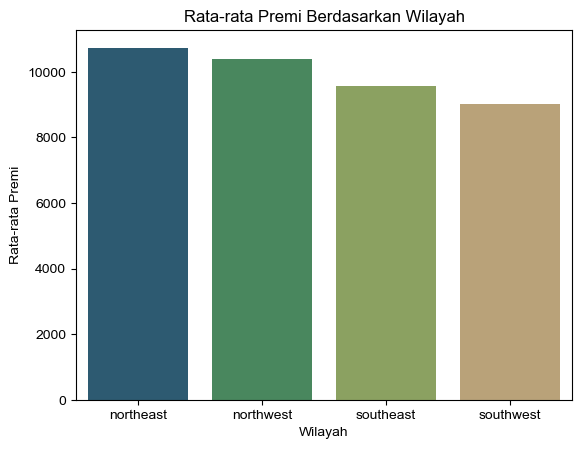

In [36]:
# Membuat visualisasi data

# Membuat bar chart 
sns.barplot(x='region', y='charges', data=region_result_no, palette='gist_earth')

# Menampilkan grid
sns.set(style="whitegrid")

# Menambahkan judul
plt.title('Rata-rata Premi Berdasarkan Wilayah')

# Mengganti label sumbu x dan y
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Premi')


# Menampilkan bar chart 
plt.show()

Berdasarkan hasil analisis, diketahui bahwa rata-rata premi yang dibayarkan oleh peserta asuransi paling banyak pada wilayah Northeast sebesar $10736.26

##### 4. Berapa premi peserta berdasarkan Kategori Status Merokok dan Kategori Berat Badan? **(visualisasi 3)**

In [37]:
# menghitung rata-rata premi dalam setiap kelompok
smoker_BMI_no = df_no_outlier.groupby(["smoker", "bmi category"]).agg({"charges" :["mean"]})

# mengurutkan urutan data dari yang tertinggi
smoker_BMI_no.sort_values(by=('charges', 'mean'), ascending=False, inplace=True)
pd.DataFrame(smoker_BMI_no)

charges
                              mean
smoker bmi category               
yes    Obesity        32120.489730
       Overweight     21740.110240
       Normal weight  19633.506277
       Underweight    18809.824980
no     Obesity         8740.394783
       Overweight      8219.709036
       Normal weight   7599.638131
       Underweight     5532.992453

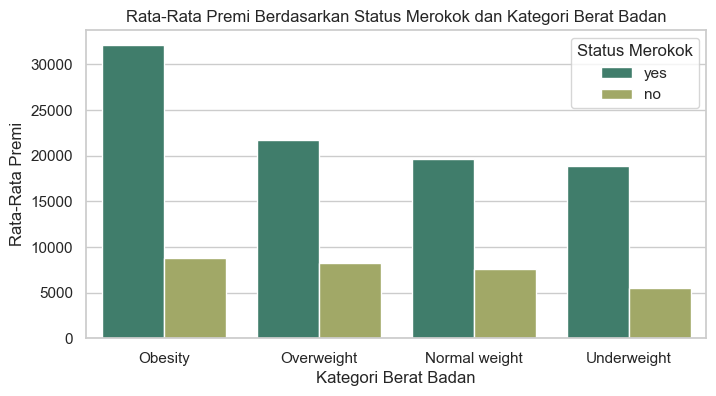

In [38]:
# Membuat visualisasi data
# Menampilkan grid
sns.set(style="whitegrid")

# Menghapus indeks multi-level
smoker_BMI_no.reset_index(inplace=True)

# Membuat bar chart 
plt.figure(figsize=(8,4))
sns.barplot(data=smoker_BMI_no, x='bmi category', y=('charges', 'mean'), hue='smoker', palette='gist_earth')

# Menambahkan judul dan label sumbu
plt.title('Rata-Rata Premi Berdasarkan Status Merokok dan Kategori Berat Badan')
plt.xlabel('Kategori Berat Badan')
plt.ylabel('Rata-Rata Premi')

# Menambahkan legenda
plt.legend(title='Status Merokok')

# Menampilkan bar chart
plt.show()


- Berdasarkan hasil analisis diketahui bahwa peserta asuransi yang merokok dan memiliki berat badan dengan kategori obesitas memiliki rata-rata premi yang tinggi yaitu sebesar $32120.48 sedangkan pada peserta asuransi yang merokok dan berat badan dengan kategori underweight memiliki rata-rata premi yang rendah yaitu sebesar $18809.82

- Untuk peserta asuransi yang tidak merokok dan memiliki berat badan dengan kategori obesitas juga memiliki rata-rata premi yang tinggi yaitu sebesar $8740.39 sedangkan pada peserta asuransi yang tidak merokok dan berat badan dengan kategori underweight memiliki rata-rata premi yang rendah yaitu sebesar $5532.99

##### 5. Berapa premi rata-rata peserta berdasarkan jenis kelamin dan kategori usia? **(visualisasi 4)**

In [39]:
#menghitung rata-rata premi dalam setiap kelompok
sex_ageCat_no = df_no_outlier.groupby(["sex", "age category"]).agg({"charges" :["mean"]})

# mengurutkan urutan data dari yang tertinggi
sex_ageCat_no.sort_values(by=('charges', 'mean'), ascending=False, inplace=True)
pd.DataFrame(sex_ageCat_no)

charges
                             mean
sex    age category              
female Lansia        13858.971222
male   Lansia        13531.811517
female Dewasa         8119.474954
male   Dewasa         7885.869932
       Remaja         6269.802018
female Remaja         6196.538970

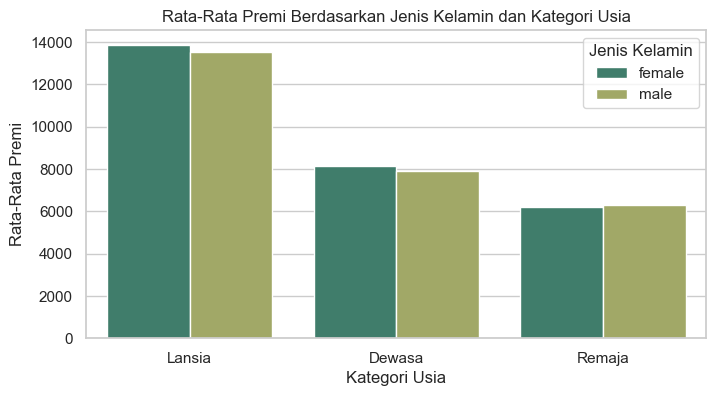

In [40]:
# Membuat visualisasi data
# Menampilkan grid
sns.set(style="whitegrid")

# Menghapus indeks multi-level
sex_ageCat_no.reset_index(inplace=True)

# Membuat bar chart 
plt.figure(figsize=(8, 4))
sns.barplot(data=sex_ageCat_no, x='age category', y=('charges', 'mean'), hue='sex', palette='gist_earth')

# Menambahkan judul dan label sumbu
plt.title('Rata-Rata Premi Berdasarkan Jenis Kelamin dan Kategori Usia')
plt.xlabel('Kategori Usia')
plt.ylabel('Rata-Rata Premi')

# Menambahkan legenda
plt.legend(title='Jenis Kelamin')

# Menampilkan bar chart
plt.show()


- Berdasarkan hasil analisis diketahui peserta asuransi lansia dan berjenis kelamin perempuan memiliki rata-rata premi yang tinggi sebesar $13858.97

- Berdasarkan hasil analisis diketahui peserta asuransi dewasa dan berjenis kelamin perempuan  memiliki rata-rata premi yang tinggi sebesar $8119.47

- Berdasarkan hasil analisis diketahui peserta asuransi remaja dan berjenis kelamin laki-laki memiliki rata-rata premi yang tinggi sebesar $6269.80


##### 6. Apakah terdapat hubungan antara kategori usia, jenis kelamin, kategori berat badan, jumlah anak, status merokok dan wilayah dengan kelompok premi yang dibayarkan oleh peserta Asuransi? **(uji hipotesis chi-square)** 



Dalam menjawab pertanyaan ini, saya akan membuat kolom baru untuk kategori premi berdasarkan rata-rata premi dan selanjutnya akan dianalisis dengan uji chi-square pada variabel kategori usia, jenis kelamin, kategori berat badan, jumlah anak, status merokok, wilayah terhadap kelompok premi (Murah dan Mahal) yang dibayarkan oleh peserta Asuransi.

##### Membuat Kolom Baru 'Charges Category'

In [41]:
# Menghitung rata-rata premi
mean_charges_no = df_no_outlier['charges'].mean()

# Membuat kategori charges setelah data outlier di hapus
def category_charges(charges):
    if charges <= mean_charges_no:
        return 'Murah'
    else:
        return 'Mahal'

# Membuat kategori baru menggunakan apply()
df_no_outlier['charges category'] = df_no_outlier['charges'].apply(category_charges)

# Menampilkan DataFrame
print(df_no_outlier)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     age category   bmi category charges category  
0          Remaja     Overweight            Mahal  
1          Remaja        Obesity            Murah  
2  

C:\Users\irfan\AppData\Local\Temp\ipykernel_19716\2274339516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['charges category'] = df_no_outlier['charges'].apply(category_charges)


### Hipotesis

Untuk melakukan pengujian, perlu mendefinisikan hipotesis:


**H0**: Tidak terdapat hubungan yang signifikan antara  kategori usia, jenis kelamin, kategori berat badan, jumlah anak, status merokok dan wilayah dengan kelompok premi yang dibayarkan oleh peserta asuransi  _(Variabel dan kelompok premi saling bergantung (dependen))_

**Ha**: Terdapat hubungan yang signifikan antara  kategori usia, jenis kelamin, kategori BMI, jumlah anak, status merokok dan wilayah dengan kelompok premi yang dibayarkan oleh peserta asuransi. _(Variabel dan kelompok premi bersifat independen)_

Pengujian menggunakan tingkat kepercayaan 95% (CI95% dan alpha 5%)

In [42]:
# Menampilkan berapa banyak peserta asuransi berdasarkan kategori premi
df_no_outlier['charges category'].value_counts()

Murah    708
Mahal    490
Name: charges category, dtype: int64

In [43]:
# melakukan uji hipotesis

from scipy.stats import chi2_contingency

# Menghilangkan kolom numerik pada variabel column supaya tidak ikut di analisis
column = df_no_outlier.drop(columns=['age', 'bmi', 'charges', 'charges category']).columns

for pv in column:
    cross = pd.crosstab(df_no_outlier[pv], df_no_outlier['charges category'])
    
    # Melakukan perhitungan uji chi square
    chi2_stat, pval, dof, expected = chi2_contingency(cross)  # Mengakses p-value dari tuple yang dikembalikan
    
    # Menampilkan pesan apakah setiap kolom berhubungan atau tidak
    pesan = "dan terdapat hubungan antar variabel (dependent)" if pval < 0.05 else ""

    # Menampilkan nilai p-value 
    print(f"Nilai pvalue dari {pv} dan kategori premi adalah {pval} {pesan},\n")


Nilai pvalue dari sex dan kategori premi adalah 0.3984547512512061 ,

Nilai pvalue dari children dan kategori premi adalah 0.00042919848913563607 dan terdapat hubungan antar variabel (dependent),

Nilai pvalue dari smoker dan kategori premi adalah 2.450248657507703e-50 dan terdapat hubungan antar variabel (dependent),

Nilai pvalue dari region dan kategori premi adalah 0.06536005673097962 ,

Nilai pvalue dari age category dan kategori premi adalah 4.757325481707912e-75 dan terdapat hubungan antar variabel (dependent),

Nilai pvalue dari bmi category dan kategori premi adalah 0.3502992741218164 ,



**Critical value: 0.05**

- Berdasarkan hasil analisis diketahui bahwa terdapat hubungan antara jumlah anak < 0.05 (critical value) dengan kelompok premi yang harus dibayarkan oleh peserta asuransi.

- Berdasarkan hasil analisis diketahui bahwa terdapat hubungan antara status merokok < 0.05 (critical value) dengan kelompok premi yang harus dibayarkan oleh peserta asuransi.

- Berdasarkan hasil analisis diketahui bahwa terdapat hubungan antara kelompok usia < 0.05 (critical value) dengan kelompok premi yang harus dibayarkan oleh peserta asuransi.

**Dapat ditarik kesimpulan bahwa H0 ditolak, yaitu Terdapat hubungan antara jumlah anak, status merokok, dan kelompok usia terhadap kelompok premi yang harus dibayarkan oleh peserta asuransi**

In [44]:
# Menampilkan Contingency Table Jumlah Anak dengan Kelompok Premi
olr_contingency_table_children = pd.crosstab(df_no_outlier['children'],df_no_outlier['charges category'])
olr_contingency_table_children

charges category,Mahal,Murah
children,,
0,231,290
1,93,199
2,80,126
3,66,72
4,15,8
5,5,13


- Pada hasil tabel kontingensi diketahui bahwa sebanyak 231 peserta asuransi yang tidak memiliki anak mendapatkan kelompok premi yang mahal dan sebanyak 290 peserta yang memiliki kelompok premi yang murah. 

- Peserta asuransi yang memiliki jumlah 1 anak mendapatkan kelompok premi mahal sebanyak 93 orang dan 199 orang mendapatkan kelompok premi yang murah.

- Peserta asuransi yang memiliki jumlah 2 anak mendapatkan kelompok premi mahal sebanyak 80 orang dan 126 orang mendapatkan kelompok premi yang murah.

- Peserta asuransi yang memiliki jumlah 3 anak mendapatkan kelompok premi mahal sebanyak 66 orang dan 72 orang mendapatkan kelompok premi yang murah.

- Peserta asuransi yang memiliki jumlah 4 anak mendapatkan kelompok premi mahal sebanyak 15 orang dan 8 orang mendapatkan kelompok premi yang murah.

- Peserta asuransi yang memiliki jumlah 5 anak mendapatkan kelompok premi mahal sebanyak 5 orang dan 13 orang mendapatkan kelompok premi yang murah.

In [ ]:
# Menampilkan Contingency Table Status Merokok dengan Kelompok Premi
olr_contingency_table_smoker = pd.crosstab(df_no_outlier['smoker'],df_no_outlier['charges category'])
olr_contingency_table_smoker


charges category,Mahal,Murah
smoker,,
no,352,708
yes,138,0


Pada hasil tabel kontingensi diketahui bahwa sebanyak 352 peserta asuransi yang tidak merokok memiliki kelompok premi mahal, dan sebanyak 708 peserta auransi yang tidak merkok memiliki kelompok premi murah. Untuk peserta asuransi yang merokok, terdapat 138 peserta memiliki kelompok premi mahal dan tidak ada yang memiliki kelompok premi yang murah.

In [ ]:
# Menampilkan Contingency Table Kelompok Usia dengan Kelompok Premi
olr_contingency_table_age = pd.crosstab(df_no_outlier['age category'],df_no_outlier['charges category'])
olr_contingency_table_age


charges category,Mahal,Murah
age category,,
Dewasa,126,501
Lansia,334,111
Remaja,30,96


- Pada hasil tabel kontingensi diketahui bahwa sebanyak 126 peserta asuransi pada kategori usia dewasa memiliki kelompok premi yang mahal dan sebaliknya sebanyak 501 peserta yang memiliki kelompok premi yang murah. 

- Sebanyak 334 peserta asuransi pada kategori usia lansia memiliki kelompok premi yang mahal dan sebanyak 111 peserta yang memiliki kelompok premi yang murah. 

- Untuk kategori usia remaja, sebanyak 30 peserta asuransi memiliki kelompok premi yang mahal dan sebanyak 96 peserta yang memiliki kelompok premi yang murah. 


##### 7. Apakah status merokok sangat mempengaruhi besarnya premi? **(uji korelasi & visual deskriptif)**

Saya ingin mengetahui apakah terdapat hubungan antara status merokok dengan premi dan seberapa kuat hubungan kedua variabel tersebut. Oleh karena itu saya melakukan uji korelasi dengan uji spearman. Uji spearman dilakukan karena data tidak berdistribusi normal (non parametrik ) serta subjek yang diuji berasal dari data yang berbeda.

In [ ]:
# Melakukan uji korelasi dengan spearman
corr_rho, pval_s = stats.spearmanr(df_no_outlier['smoker'], df_no_outlier['charges'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")


rho-correlation: 0.50, p-value: 5.957626675358091e-77


- Berdasarkan hasil analisis tersebut diketahui bahwa terdapat hubungan antara status merokok dengan premi, artinya status merokok sangat mempengaruhi besarnya premi dengan pvalue < 0.05 dan nilai r = 0.50 (karena hasil berada diantara pada nilai r = 0.26 - 0.50 kategori hubungan cukup). Selain itu, nilai r menunjukkan hubungan yang positif antara status merokok dengan besarnya premi yang dibayarkan oleh peserta asuransi

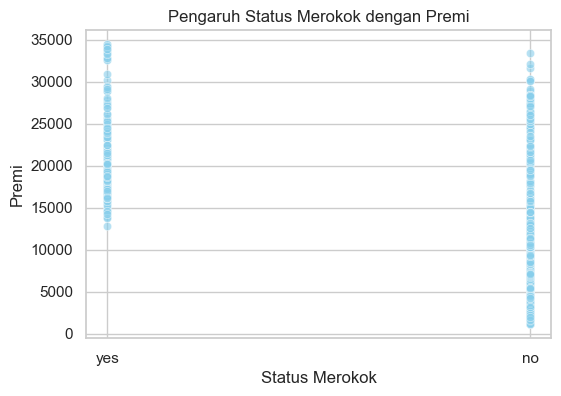

In [ ]:

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat scatter plot menggunakan Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_no_outlier, x='smoker', y='charges', color='skyblue', alpha=0.6)

# Menambahkan judul dan label sumbu
plt.title('Pengaruh Status Merokok dengan Premi')
plt.xlabel('Status Merokok')
plt.ylabel('Premi')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()



Berdasarkan grafik tersebut, diketahui bahwa semakin tinggi nilai premi jika peserta asuransi merokok dan sebaliknya semakin rendah nilai premi jika peserta asuransi tidak merokok

In [69]:
# simpan DataFrame setelah hapus outlier
df_no_outlier.to_csv('Tabel_Insurance_No_Outlier.csv', index=False)

## **KESIMPULAN**

- Berdasarkan analisis yang dilakukan, dapat disimpulkan bahwa: 

1. Rata-rata premi sebesar $9934.67 dengan nilai terendah sebesar $1121.87 dan nilai tertinggi sebesar $34472.84

2. Rata-rata premi tertinggi pada peserta asuransi perempuan yang sudah lansia, memiliki berat badan overweight, memiliki 4 anak dan merokok.

3. Wilayah yang memiliki rata-rata premi tertinggi yaitu northeast.

4. Peserta asuransi yang merokok dan memiliki berat badan dengan kategori obesitas memiliki rata-rata premi yang paling tinggi yaitu sebesar $32120.48

5. Berdasarkan hasil analisis diketahui peserta asuransi lansia dan berjenis kelamin perempuan memiliki rata-rata premi yang tinggi sebesar $13858.97

6. Terdapat hubungan antara jumlah anak, status merokok, dan kelompok usia terhadap kelompok premi yang harus dibayarkan oleh peserta asuransi.

    Hal ini karena semakin banyak anak semakin besar biaya yang ditanggung. Selain itu, status merokok sangat mempengaruhi besarnya premi karena merokok dapat meningkatkan risiko  menderita penyakit di usia yang lebih muda dan akan  dipertimbangkan oleh perusahaan asuransi saat menetapkan premi asuransi dari calon peserta nasabah. Usia juga menjadi salah satu faktor penting yang mempengaruhi besarnya premi karena semakin muda umur tertanggung, maka harga premi juga cenderung lebih rendah. Hal ini dikarenakan, peserta yang masih muda memiliki risiko kematian yang lebih rendah. Dengan kata lain, risiko kematian meningkat seiring bertambahnya usia. 

7. Status merokok sangat mempengaruhi besarnya premi dan menunjukkan hubungan yang positif.

- Oleh karena itu, sebagai calon peserta asuransi kesehatan dianjurkan untuk menjalani pola hidup yang sehat karena terdapat beberapa pertimbangan yang menjadikan setiap orang memiliki nilai premi yang berbeda. Selain itu, untuk untuk menghindari kesalahpahaman mengenai premi asuransi yang mahal, sebagai calon peserta dapat memilih plan asuransi sesuai dengan kebutuhan. 
